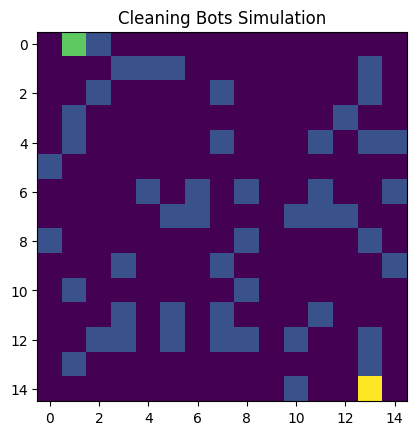

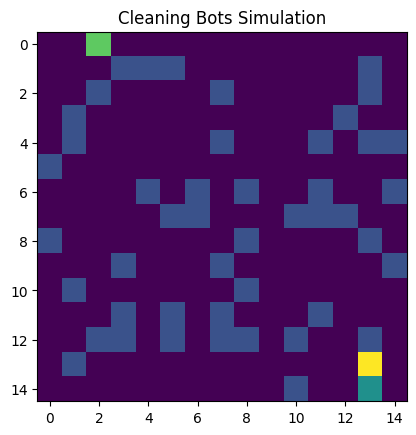

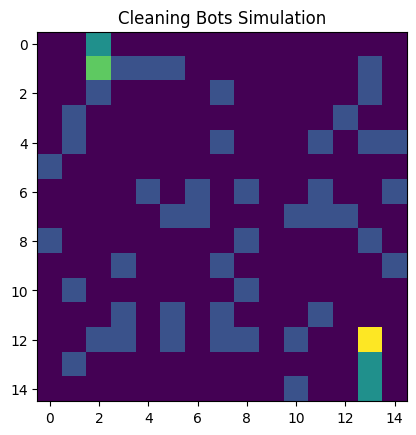

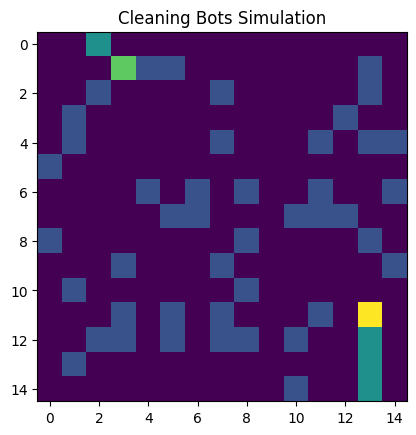

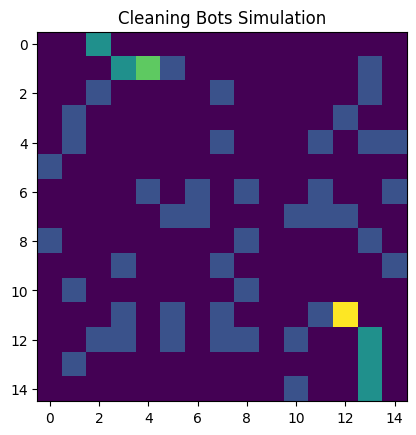

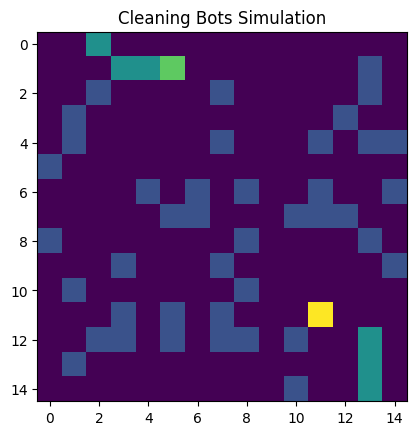

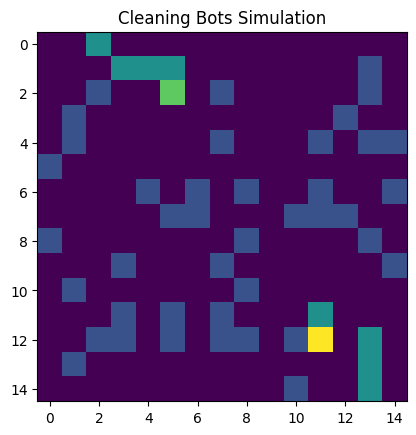

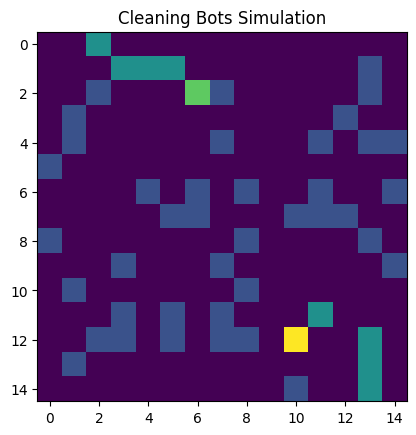

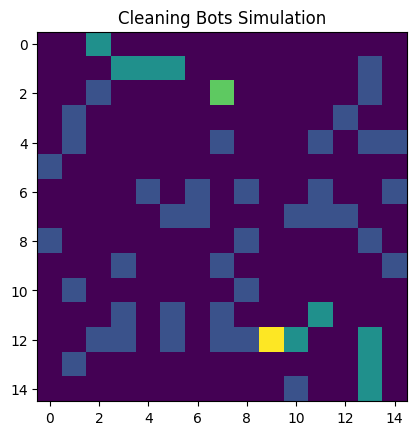

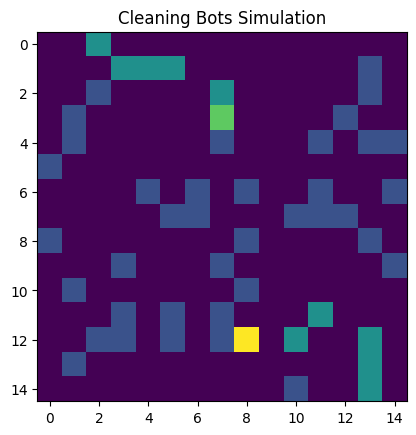

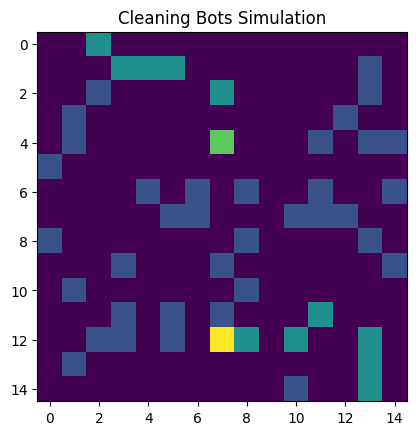

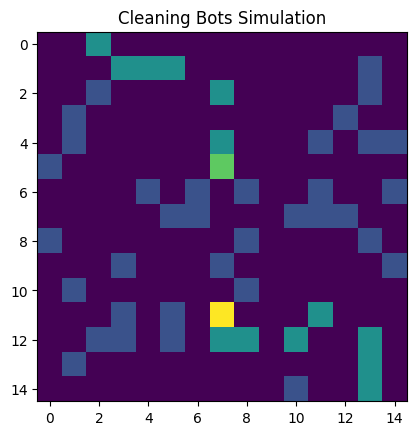

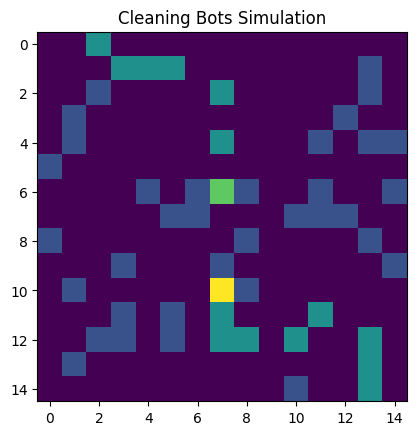

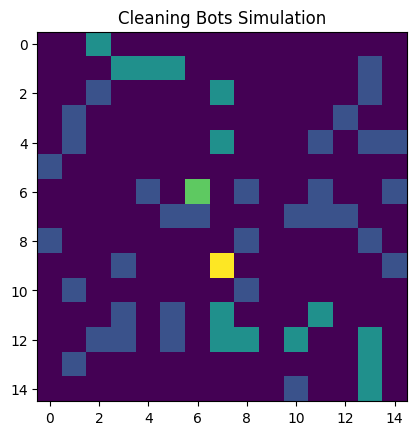

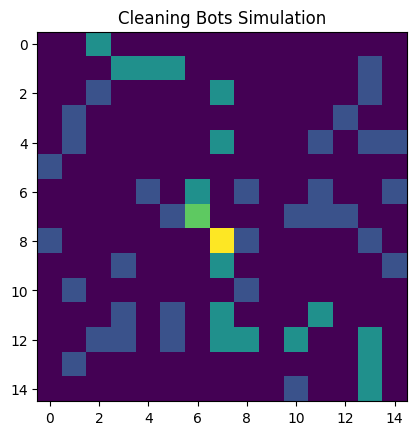

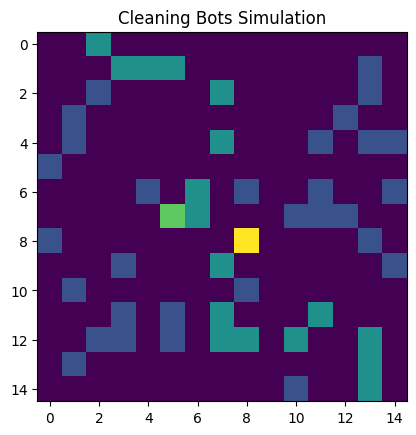

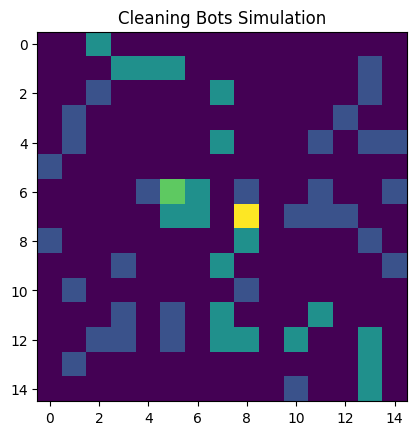

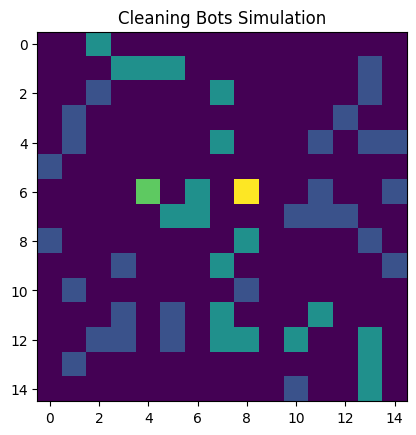

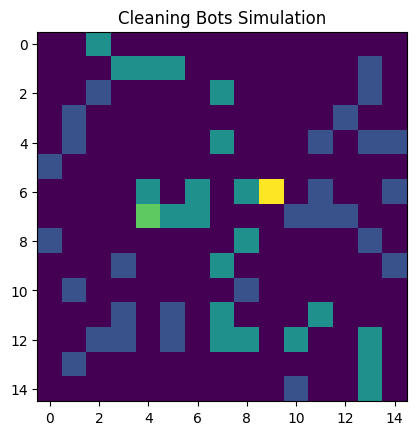

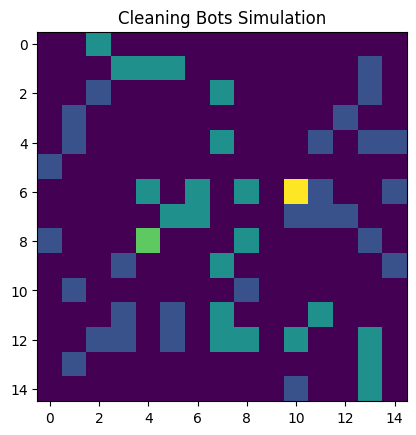

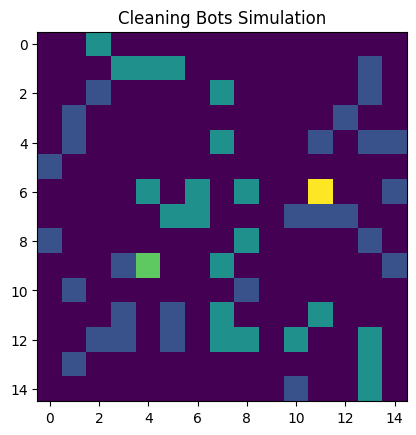

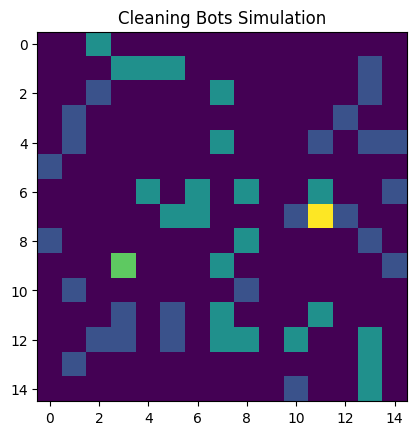

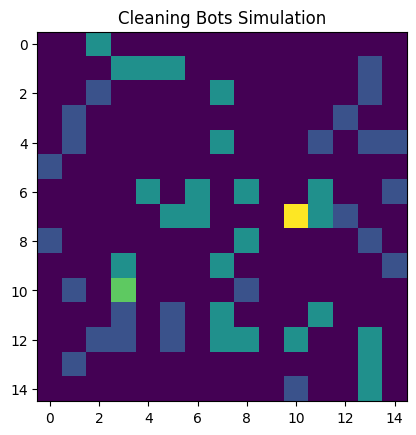

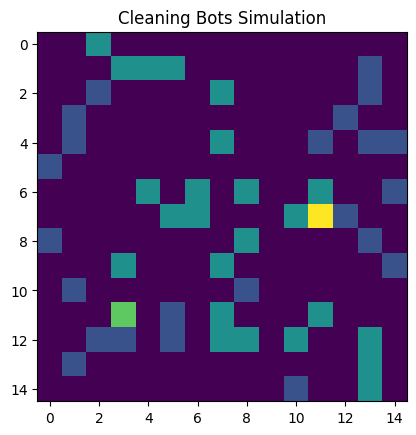

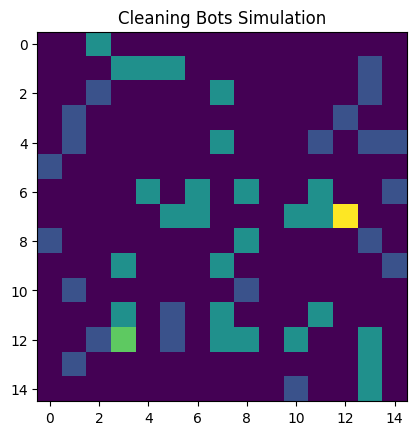

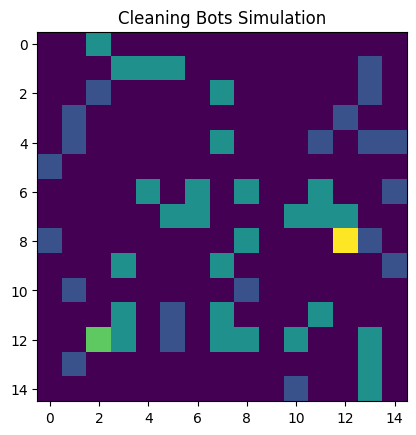

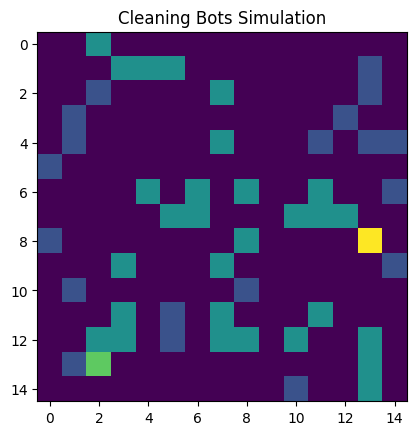

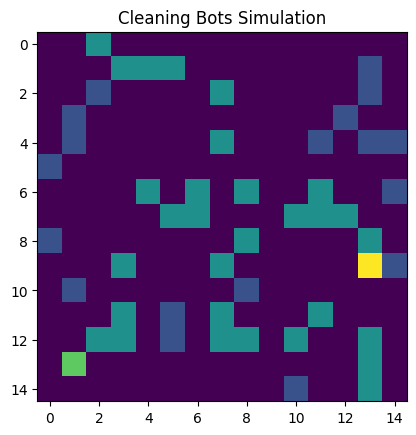

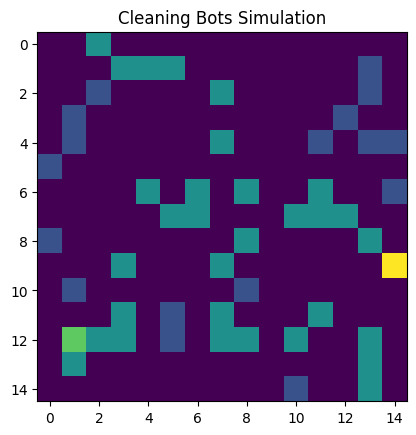

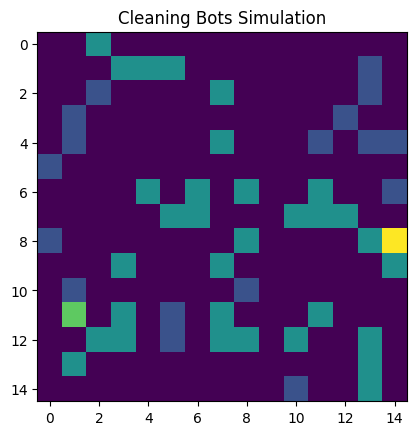

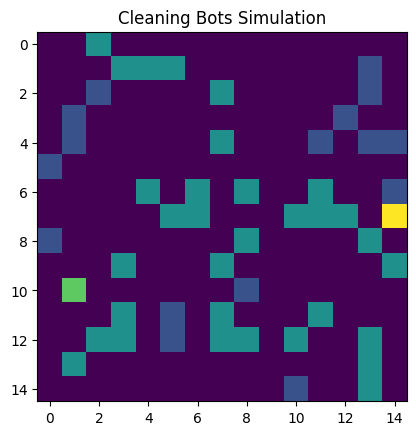

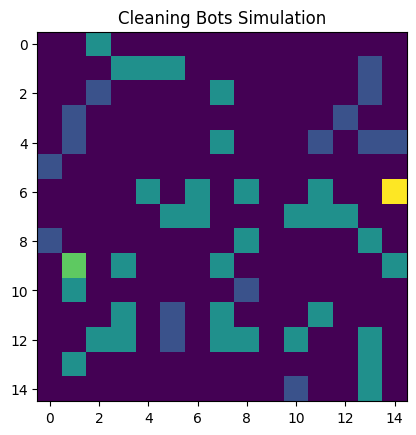

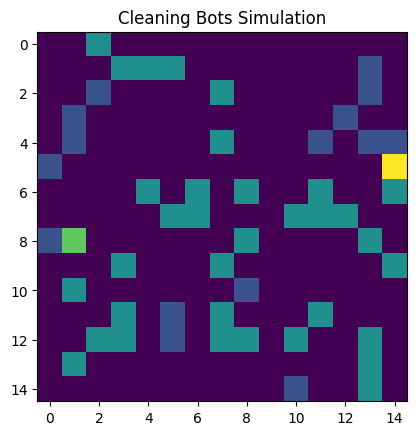

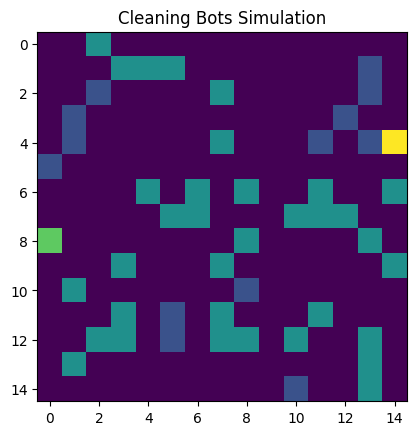

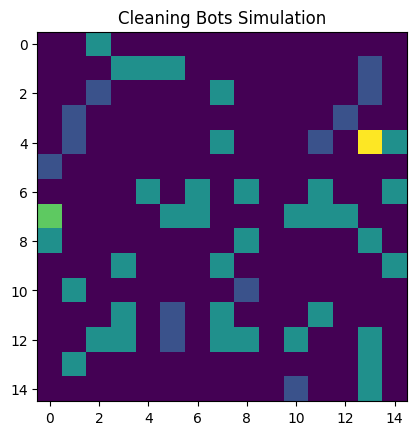

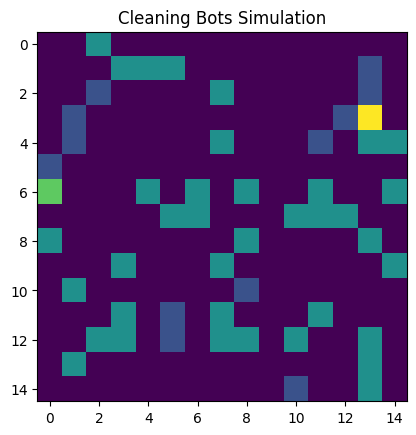

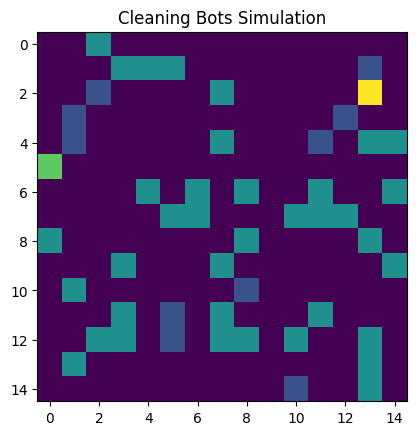

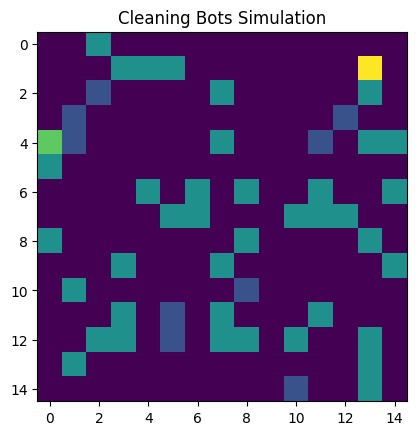

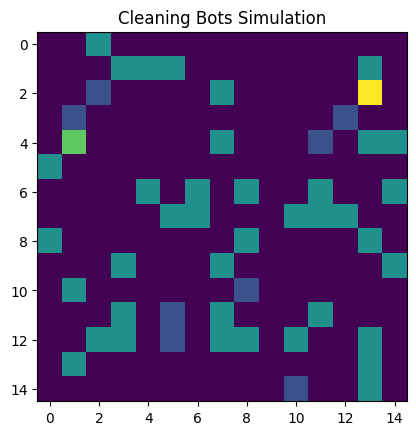

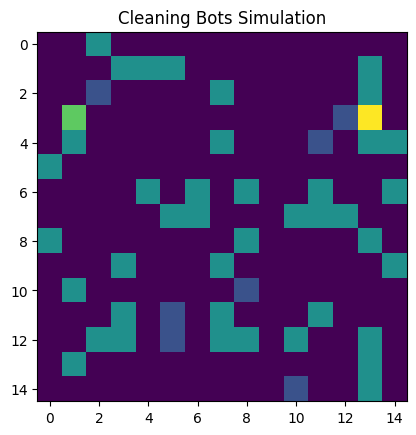

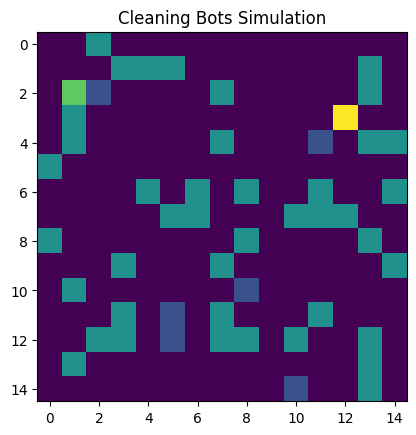

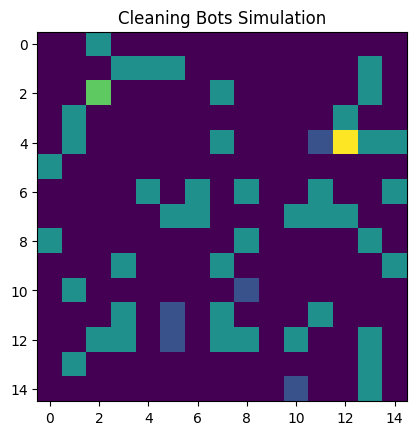

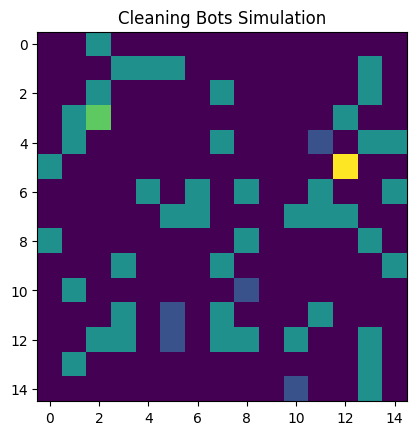

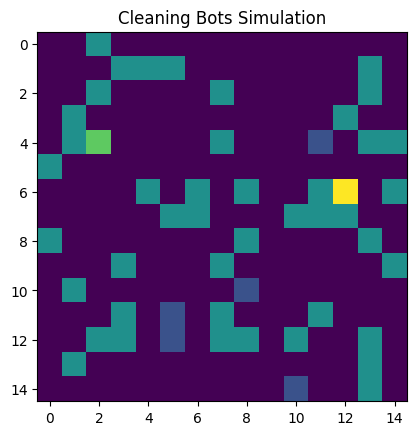

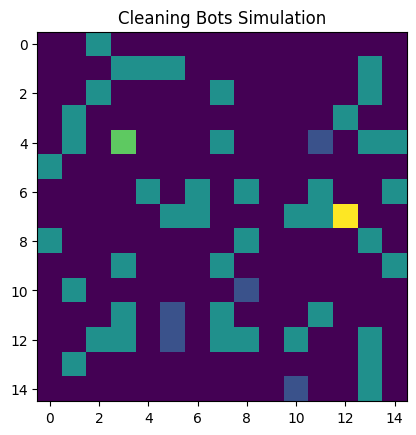

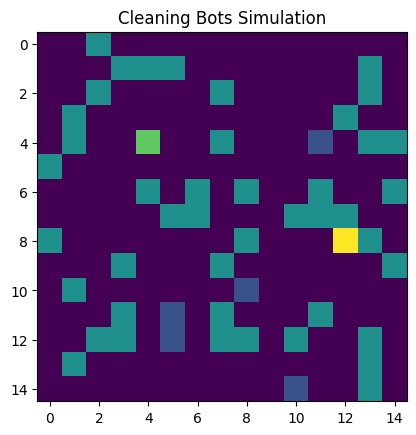

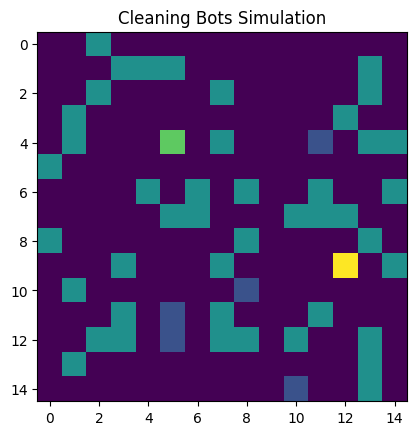

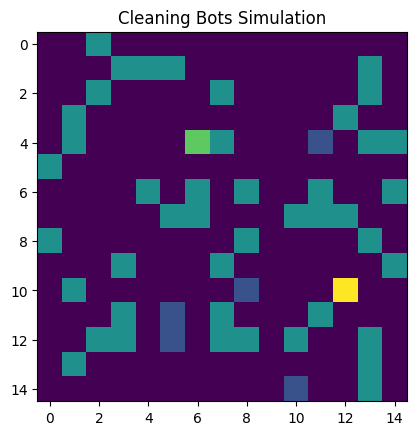

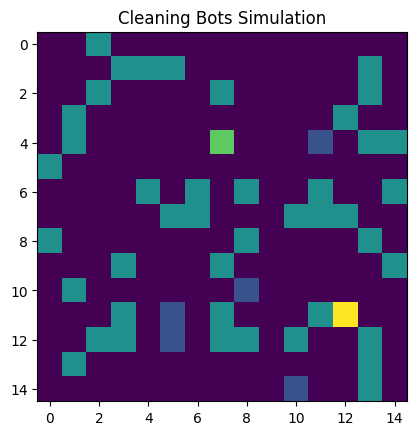

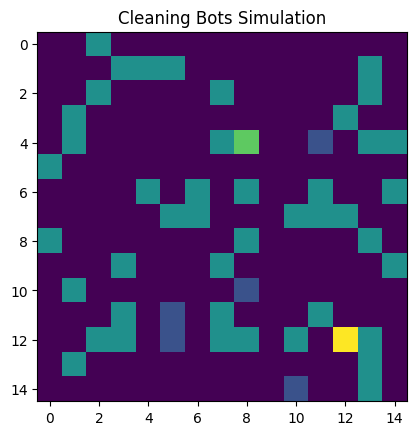

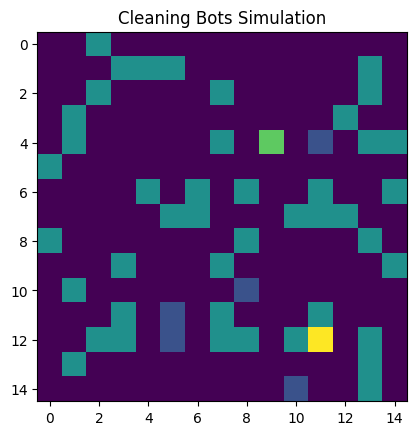

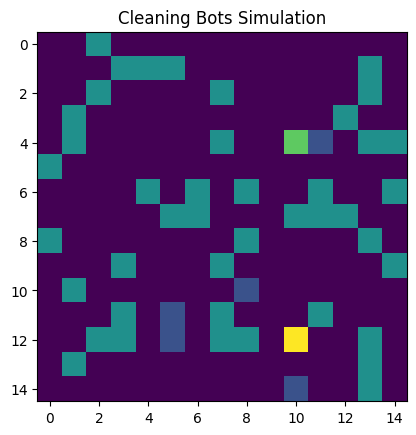

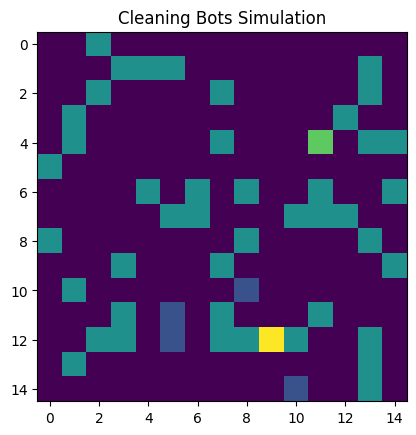

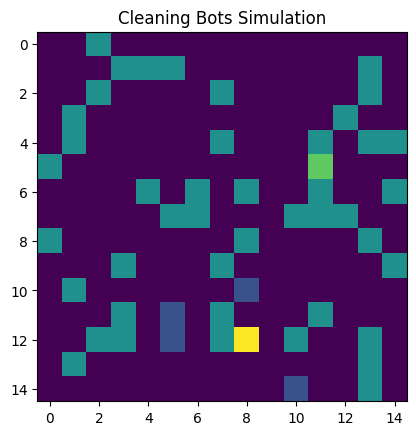

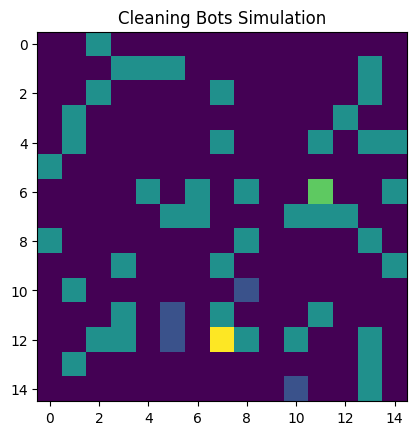

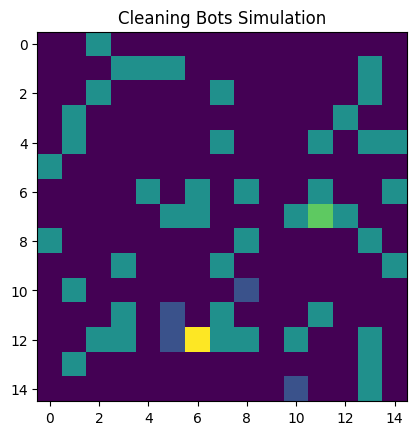

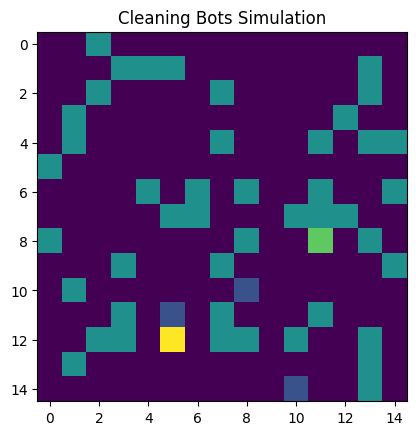

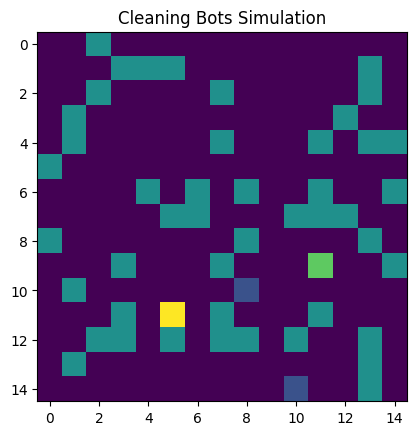

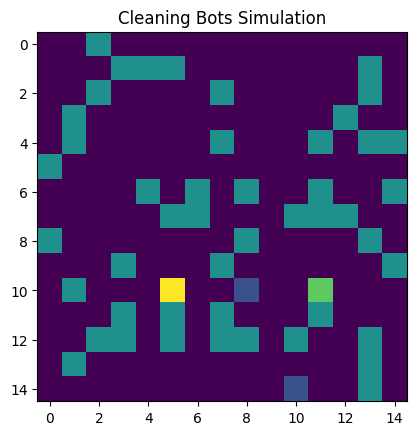

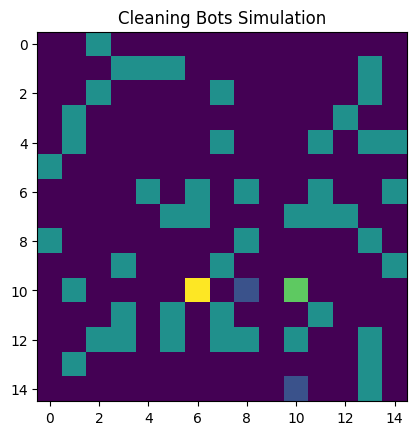

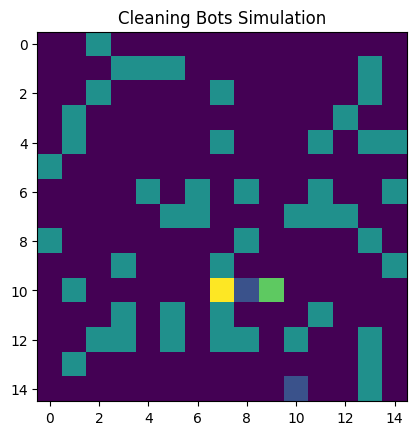

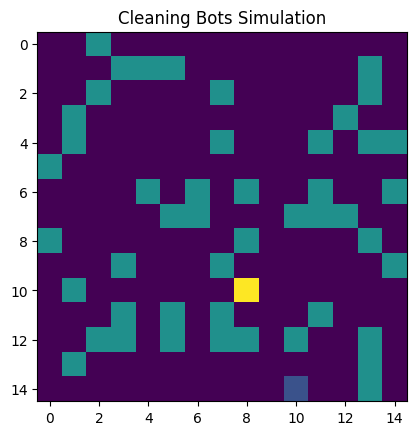

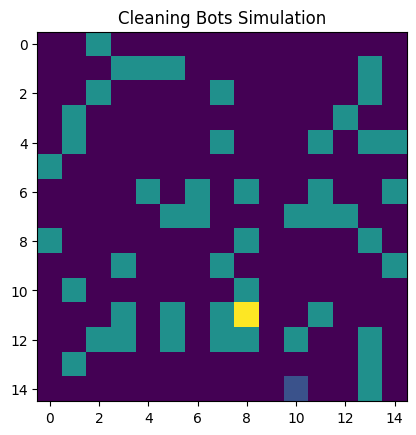

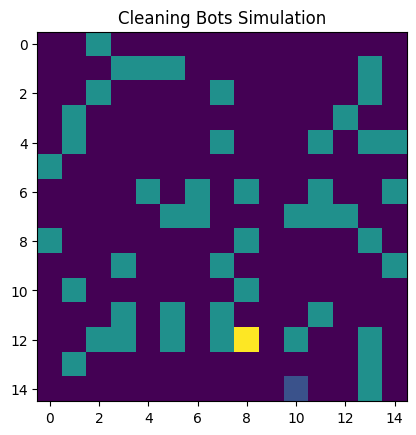

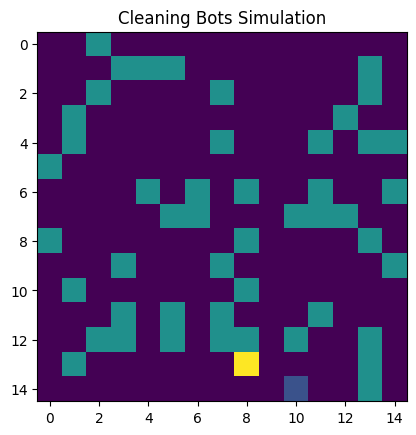

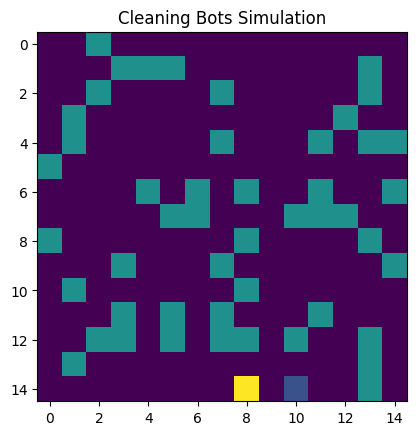

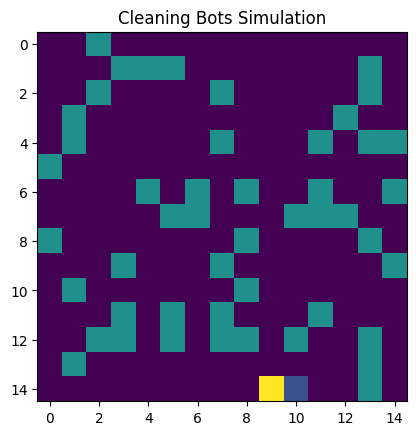

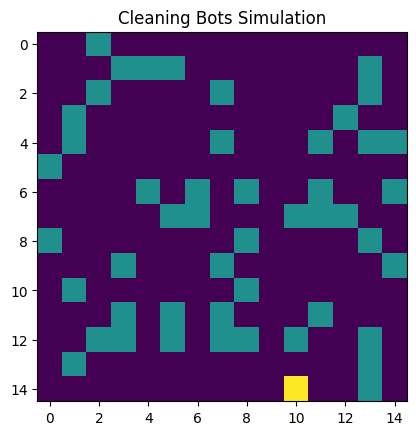


--- RESULTS ---
Total Cleaned: 49
Total Steps: 68
Efficiency: 0.721


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ------------------------------
# PARAMETERS
# ------------------------------
ROWS, COLS = 15, 15
DIRTY_PROB = 0.25
SLEEP = 0.12

grid = np.random.choice([0, 1], size=(ROWS, COLS), p=[1-DIRTY_PROB, DIRTY_PROB])
cleaned = np.zeros_like(grid)

bot1 = [0, 0]
bot2 = [ROWS-1, COLS-1]

target1, target2 = None, None

# ------------------------------
# NEAREST DIRTY CELL
# ------------------------------
def nearest_dirty(pos):
    dirty_cells = [(r, c) for r in range(ROWS) for c in range(COLS) if grid[r][c] == 1]
    if not dirty_cells:
        return None
    dirty_cells.sort(key=lambda d: abs(d[0]-pos[0]) + abs(d[1]-pos[1]))
    return dirty_cells[0]

# ------------------------------
# MOVE ONE STEP TOWARD TARGET
# ------------------------------
def step(pos, target):
    if target is None:
        return pos
    if pos[0] < target[0]: pos[0] += 1
    elif pos[0] > target[0]: pos[0] -= 1
    elif pos[1] < target[1]: pos[1] += 1
    elif pos[1] > target[1]: pos[1] -= 1
    return pos

# ------------------------------
# VISUALIZATION
# ------------------------------
def show():
    plt.clf()
    img = np.copy(grid)

    for r in range(ROWS):
        for c in range(COLS):
            if cleaned[r][c] == 1:
                img[r][c] = 2

    img[bot1[0]][bot1[1]] = 3
    img[bot2[0]][bot2[1]] = 4

    plt.imshow(img, cmap="viridis")
    plt.title("Cleaning Bots Simulation")
    plt.pause(SLEEP)

# ------------------------------
# SIMULATION LOOP
# ------------------------------
steps = 0
clean_count = 0

while np.any(grid == 1):     # loop until no dirty cells left
    steps += 1

    # Assign new targets ONLY if bot reached its old one
    if target1 is None or grid[target1] == 0:
        target1 = nearest_dirty(bot1)

    if target2 is None or grid[target2] == 0:
        target2 = nearest_dirty(bot2)

    # Prevent bots from chasing the same target (simple rule)
    if target1 == target2:
        target2 = nearest_dirty(bot2[::-1])  # pick different direction first

    # Move bots
    bot1 = step(bot1, target1)
    bot2 = step(bot2, target2)

    # Clean when arriving
    for b in [bot1, bot2]:
        r, c = b
        if grid[r][c] == 1:
            grid[r][c] = 0
            cleaned[r][c] = 1
            clean_count += 1

    show()

plt.show()

# ------------------------------
# RESULTS
# ------------------------------
print("\n--- RESULTS ---")
print("Total Cleaned:", clean_count)
print("Total Steps:", steps)
print("Efficiency:", round(clean_count / steps, 3))
